<a href="https://colab.research.google.com/github/akshitamadan/Projects/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [157]:
# Import all the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# supress the warning messages
import warnings
warnings.filterwarnings('ignore')

In [158]:
import pandas as pd
import numpy as np
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data sets/insurance.csv')

In [159]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [160]:
df.shape

(1338, 7)

In [161]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [162]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [163]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

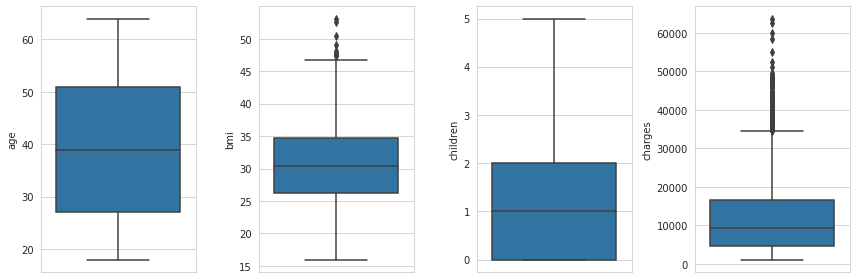

In [166]:
# Box plots to see data distribution after outlier treatment
sns.set_style("whitegrid")
fig, axs = plt.subplots(1,4, figsize = (12,4))

plt2 = sns.boxplot(y = df['age'], ax = axs[0])
plt3 = sns.boxplot(y = df['bmi'], ax = axs[1])
plt4 = sns.boxplot(y = df['children'], ax = axs[2])
plt4 = sns.boxplot(y = df['charges'], ax = axs[3])

plt.tight_layout()

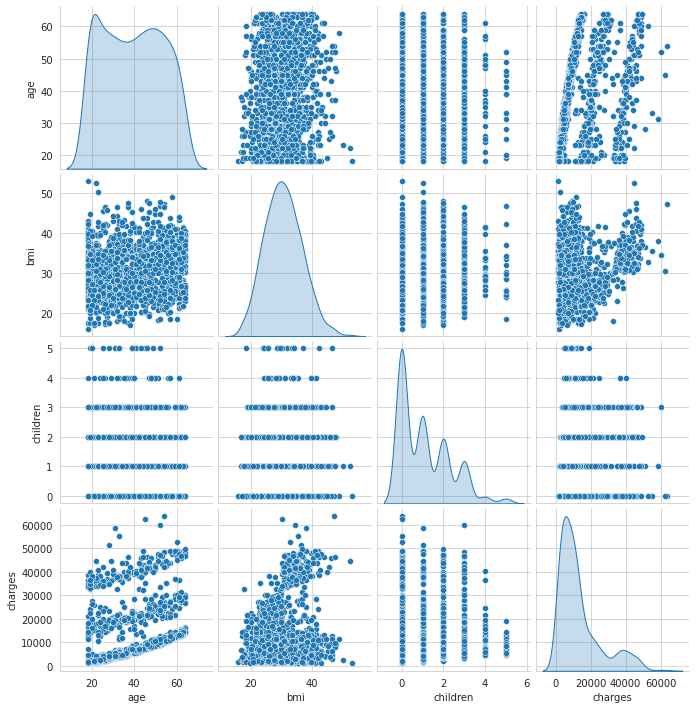

In [167]:
df_num=df[[ 'age', 'bmi', 'children', 'charges']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

In [168]:
df = pd.get_dummies(data=df, columns=['sex', 'smoker','region'], drop_first = True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [169]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=25)
X_train.shape

(1070, 9)

In [170]:
X_test.shape

(268, 9)

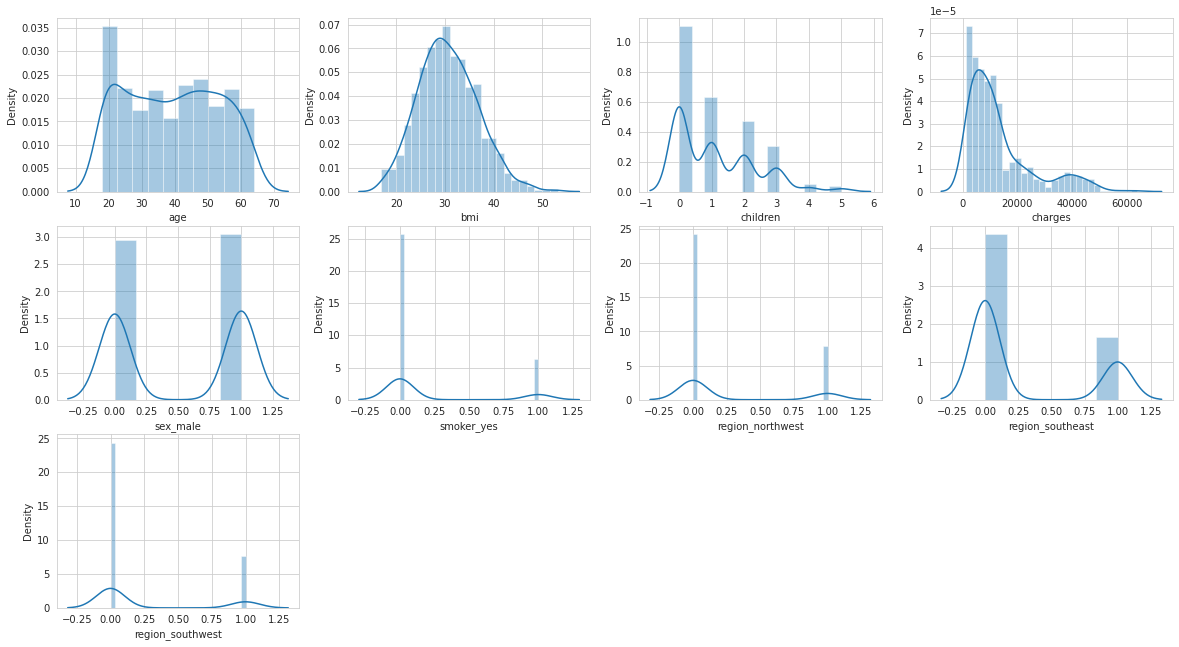

In [171]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,30))
i=0
for col in var:
    i += 1
    plt.subplot(8,4, i)
    sns.distplot(X_train[col])

plt.show()

In [172]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
Skewness,0.038263,0.337303,0.936373,1.537482,-0.033697,1.516807,1.188354,1.005284,1.230123


In [173]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['charges', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object', name='Features')


In [174]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

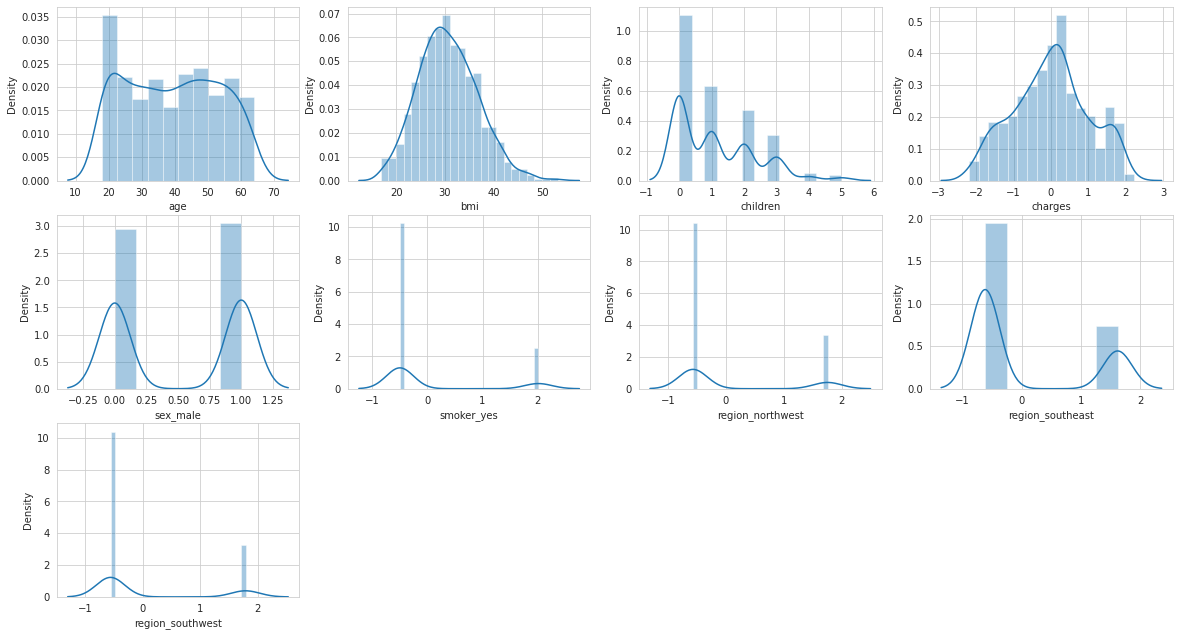

In [175]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,30))
i=0
for col in var:
    i += 1
    plt.subplot(8,4, i)
    sns.distplot(X_train[col])

plt.show()

In [176]:
scaler = StandardScaler()

num_vars = ['age', 'bmi', 'children','charges']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
629,0.331919,1.372540,-0.914169,1.747989,0,2.011758,1.756123,-0.616964,-0.55936
556,0.475011,0.460876,-0.087321,-0.104207,1,-0.497078,-0.569436,-0.616964,-0.55936
427,-1.528274,-0.246448,-0.914169,-0.244504,0,-0.497078,-0.569436,-0.616964,-0.55936
1047,-1.242090,3.627706,-0.087321,1.788660,1,2.011758,-0.569436,1.620839,-0.55936
98,1.190470,-1.771126,-0.914169,0.996441,1,2.011758,-0.569436,-0.616964,-0.55936


In [177]:
y_train_scaled = X_train.pop('charges')
X_train_scaled = X_train

In [178]:
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
748,0.546557,0.884444,-0.087321,-0.075543,0,-0.497078,-0.569436,-0.616964,1.787758
633,0.045736,-1.315295,0.739526,-0.266940,1,-0.497078,-0.569436,-0.616964,-0.559360
651,0.975833,1.480086,-0.087321,0.156752,0,-0.497078,-0.569436,1.620839,-0.559360
411,0.331919,-1.723971,-0.087321,0.844075,0,2.011758,-0.569436,-0.616964,-0.559360
502,0.832741,-1.231740,-0.087321,0.986528,1,2.011758,-0.569436,1.620839,-0.559360


In [179]:
y_test_scaled = X_test.pop('charges')
X_test_scaled = X_test
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 748 to 921
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               268 non-null    float64
 1   bmi               268 non-null    float64
 2   children          268 non-null    float64
 3   sex_male          268 non-null    uint8  
 4   smoker_yes        268 non-null    float64
 5   region_northwest  268 non-null    float64
 6   region_southeast  268 non-null    float64
 7   region_southwest  268 non-null    float64
dtypes: float64(7), uint8(1)
memory usage: 17.0 KB


In [180]:
X_train_scaled = sm.add_constant(X_train_scaled)

lm_2 = sm.OLS(y_train_scaled, X_train_scaled).fit()

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     431.8
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:30:38   Log-Likelihood:                -743.44
No. Observations:                1070   AIC:                             1505.
Df Residuals:                    1061   BIC:                             1550.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0335      0.021  

In [181]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,2.05
7,region_southeast,1.67
6,region_northwest,1.52
8,region_southwest,1.52
2,bmi,1.12
1,age,1.02
5,smoker_yes,1.02
4,sex_male,1.01
3,children,1.00


In [182]:
y_train_pred = lm_2.predict(X_train_scaled)

Text(0.5, 0, 'Errors')

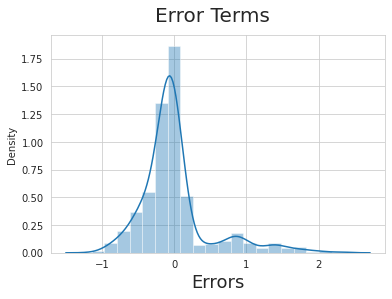

In [183]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_scaled - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'Pred')

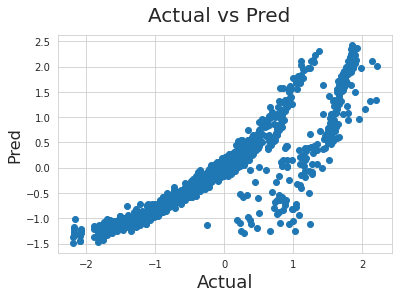

In [184]:
fig = plt.figure()
plt.scatter(y_train_scaled, y_train_pred)
fig.suptitle('Actual vs Pred', fontsize = 20)              # Plot heading 
plt.xlabel('Actual', fontsize = 18)                          # X-label
plt.ylabel('Pred', fontsize = 16)   

In [185]:
# Adding constant variable to test dataframe
X_test_lm2 = sm.add_constant(X_test_scaled)

X_test_lm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 748 to 921
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             268 non-null    float64
 1   age               268 non-null    float64
 2   bmi               268 non-null    float64
 3   children          268 non-null    float64
 4   sex_male          268 non-null    uint8  
 5   smoker_yes        268 non-null    float64
 6   region_northwest  268 non-null    float64
 7   region_southeast  268 non-null    float64
 8   region_southwest  268 non-null    float64
dtypes: float64(8), uint8(1)
memory usage: 19.1 KB


In [186]:
y_pred = lm_2.predict(X_test_lm2)

Text(0, 0.5, 'y_pred')

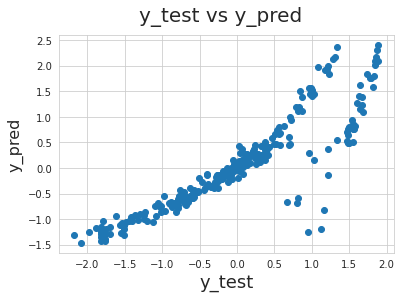

In [187]:
fig = plt.figure()
plt.scatter(y_test_scaled, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [188]:
r2_score(y_test_scaled, y_pred)

0.7925133754771352

In [189]:
n = X_test_scaled.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_scaled.shape[1]

# We find the Adjusted R-squared using the formula
r2 = 0.7925133754771352
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7861045222100197